# Graph Data Analysis

## Introduction to the Karate Club Graph
Zachary's Karate Club is a popular social network of a university karate club, described by Wayne W. Zachary in 1977. The graph captures 34 members of the club, documenting links between pairs of members who interacted outside the club. The club later split into two communities, led by the instructor and the club president.

## Data Loading and Visualization
### Load and Display the Graph
Load the Karate Club graph and visualize it to get an overview.

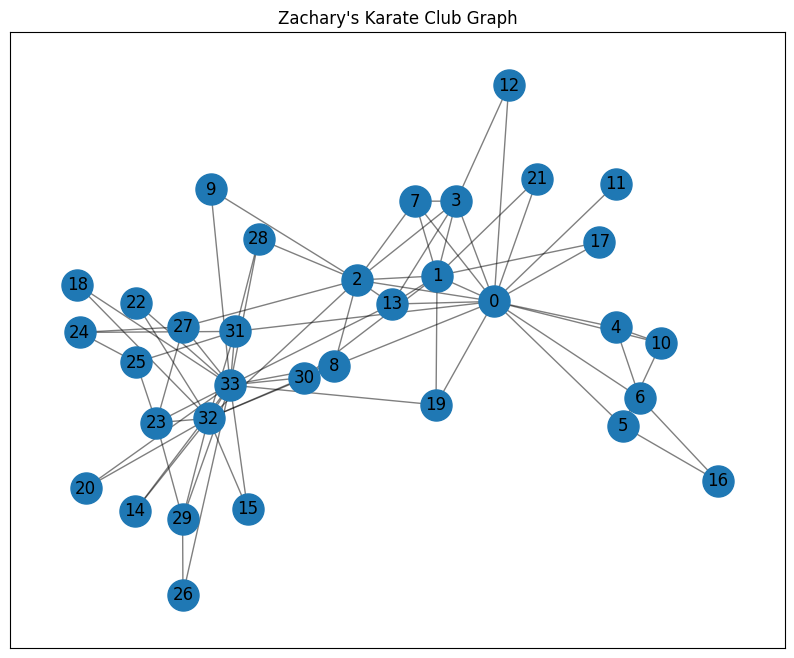

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Zachary's Karate Club Graph")
plt.show()

## Basic Graph Analysis
Analyze the graph to understand its basic properties.



In [2]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
print(f"Graph density: {nx.density(G):.2f}")
print(f"Graph transitivity: {nx.transitivity(G):.2f}")

Number of nodes: 34
Number of edges: 78
Average degree: 4.59
Is the graph connected? True
Number of connected components: 1
Graph density: 0.14
Graph transitivity: 0.26


## Community Detection
### Girvan-Newman Method
Detect communities using the Girvan-Newman method and visualize the detected communities.

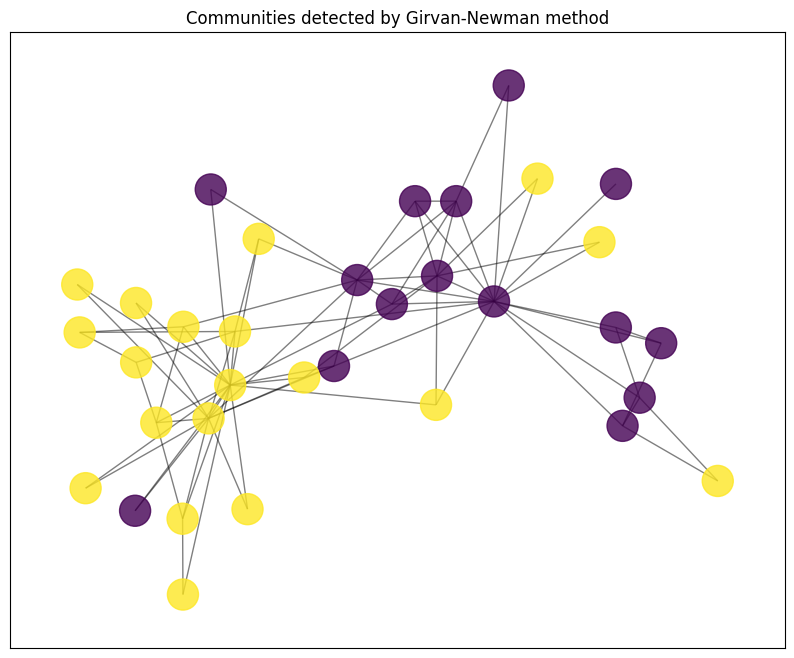

In [3]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
partition = {node: i for i, community in enumerate(top_level_communities) for node in community}
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities detected by Girvan-Newman method")
plt.show()

## Graph Feature Visualization
### Degree Distribution
Visualize the distribution of node degrees in the graph.

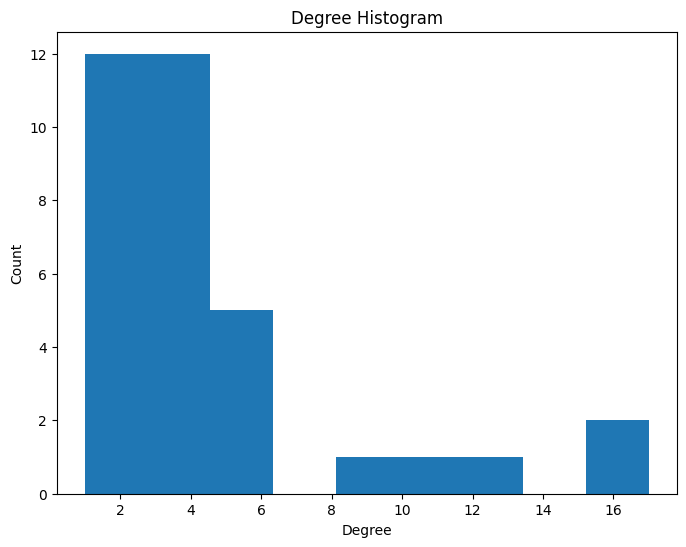

In [4]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins='auto')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

### Eigenvector Centrality
Visualize the nodes sized by their eigenvector centrality.

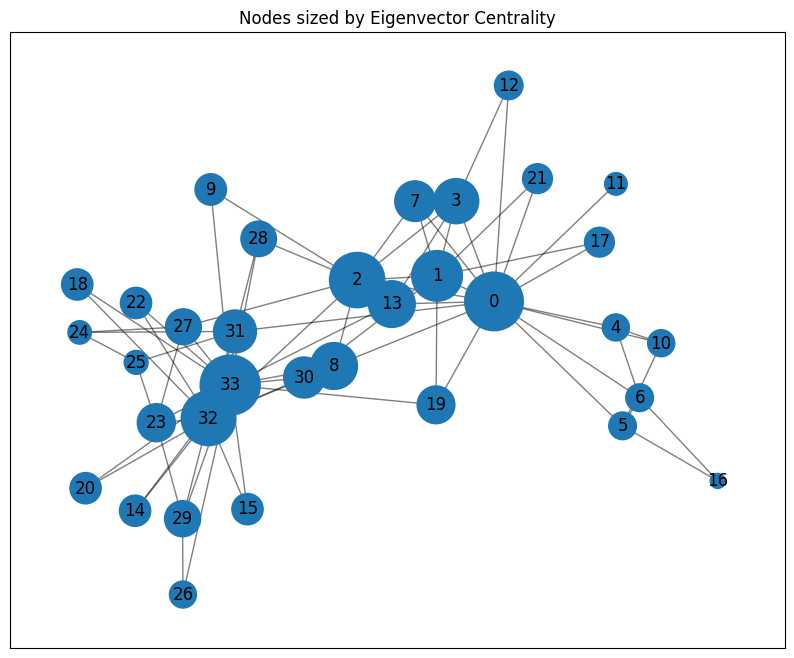

In [5]:
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in eigenvector_centrality.values()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Nodes sized by Eigenvector Centrality")
plt.show()

### Betweenness Centrality
Visualize the nodes sized by their betweenness centrality.

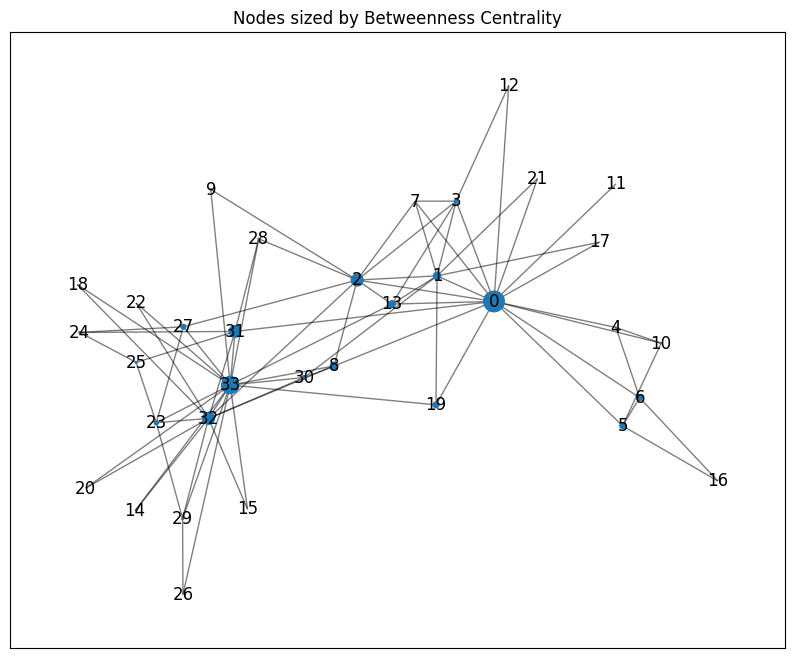

In [6]:
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=[v * 500 for v in betweenness_centrality.values()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Nodes sized by Betweenness Centrality")
plt.show()

## Node Classification using Random Forest
### Feature Extraction and Model Training
Extract features from the graph for each node, split the data, train a Random Forest classifier, and evaluate its performance.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def extract_features(G, nodes):
    features = []
    for node in nodes:
        neighbors = list(G.neighbors(node))
        avg_neighbor_degree = sum([G.degree(n) for n in neighbors]) / len(neighbors) if neighbors else 0
        features.append([G.degree(node), nx.clustering(G, node), avg_neighbor_degree])
    return features

nodes = list(G.nodes())
X = extract_features(G, nodes)
y = [partition[node] for node in nodes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 54.55%
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.67      0.57      0.62         7

    accuracy                           0.55        11
   macro avg       0.53      0.54      0.53        11
weighted avg       0.57      0.55      0.55        11

